In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv('../data/hotel_bookings.csv')

# Shape and types
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# First and last rows
df.head()



Shape: (119390, 32)

Data Types:
 hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


          Missing Values    Percent
children               4   0.003350
country              488   0.408744
agent              16340  13.686238
company           112593  94.306893


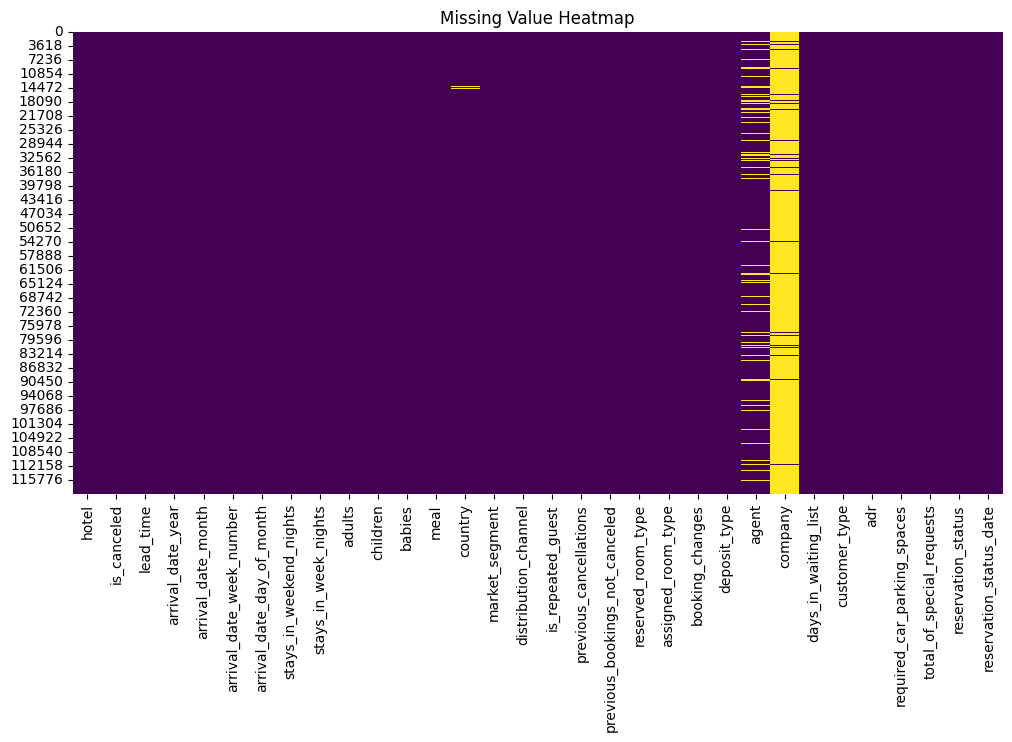

In [3]:
# Missing value table
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percent': missing_percent})
missing_df = missing_df[missing_df['Missing Values'] > 0]
print(missing_df)

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()


Duplicates: 31994


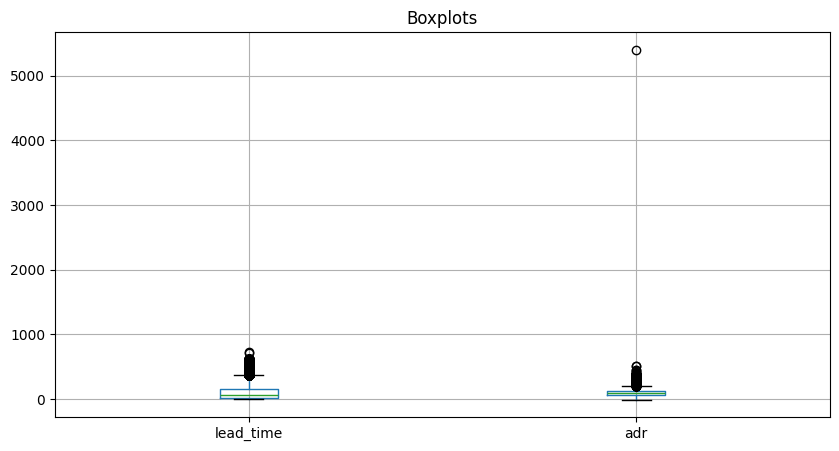

Invalid guest rows: 180


In [4]:
# Duplicates
print("Duplicates:", df.duplicated().sum())

# Outliers (boxplot)
df[['lead_time', 'adr']].boxplot(figsize=(10, 5))
plt.title("Boxplots")
plt.show()

# Impossible combinations (no guests)
invalid_guests = df[(df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0)]
print("Invalid guest rows:", len(invalid_guests))


In [5]:
# Fill Children with 0
df['children'].fillna(0, inplace=True)

# Country: Fill with mode
df['country'].fillna(df['country'].mode()[0], inplace=True)

# Agent and Company: Replace with 0
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)


In [6]:
duplicates = df.duplicated()
print("Exact Duplicates:", duplicates.sum())

# Remove
df = df[~duplicates]


Exact Duplicates: 32013


In [7]:
# Example for 'adr'
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['adr'] >= lower) & (df['adr'] <= upper)]


In [9]:
# Remove rows with no guests
df = df[~((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]



In [10]:
# Validate guest count
df['total_guests'] = df['adults'] + df['children'] + df['babies']
print("Rows with 0 total guests:", (df['total_guests'] == 0).sum())

# Check range of dates, values
print("Date range:", df['arrival_date_year'].unique())


Rows with 0 total guests: 0
Date range: [2015 2016 2017]


In [11]:
df.to_csv('../data/hotel_bookings_cleaned.csv', index=False)
